### Please implement the code from this blogpost in this notebook: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [15]:
salary_data = pd.read_csv("https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_data.csv")
salary_positions = pd.read_csv("https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv")

In [35]:
salary_data.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [13]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [17]:
salary_positions.head()

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000

In [24]:
x = salary_data[["YearsExperience"]]
y = salary_data[["Salary"]]

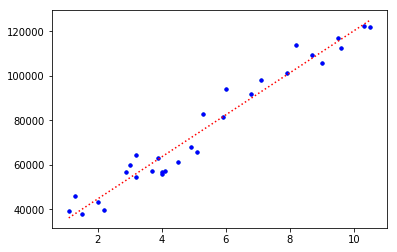

In [33]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

%matplotlib inline

plt.scatter(salary_data["YearsExperience"],salary_data["Salary"], s=10)
plt.scatter(x, y, s=10, color = "b")
plt.plot(x, y_pred, ":", color='r')
plt.show()

In [ ]:
# To understand the need for polynomial regression, let’s generate some random dataset first.
# https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

import matplotlib.pyplot as plt
#from IPython.display import Image
%matplotlib inline

plt.scatter(salary_positions["YearsExperience"],salary_data["Salary"], s=10)
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
print(dataset.head(11))
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print(X)
print(y)


            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [78]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train.shape

(8,)

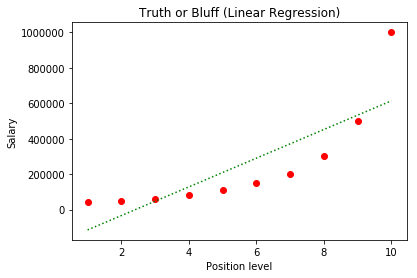

In [46]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), ":", color='green')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [79]:
lin_reg.fit(X_train, y_train)
y_model = lin_reg.predict(X_test)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

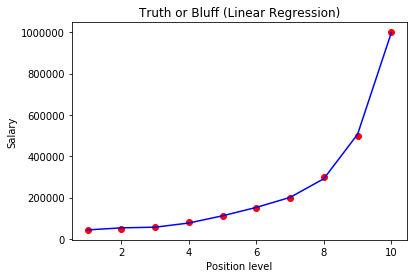

In [54]:
#Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [55]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])
#output should be 249500

# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[5.5]]))
#output should be 132148.43750003

array([132148.43749963])

ValueError: Found input variables with inconsistent numbers of samples: [2, 10]